In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["font.family"]=['SimHei'] # 用来正常显示中文 windows
plt.rcParams['axes.unicode_minus']=False # ⽤来正常显示负号

# 1. 爬取NBA球队排名页面，并进行分析

- 页面url https://nba.hupu.com/standings

>提示

```
data = pd.read_html(url, header=1)
```

In [23]:
# 爬取数据并将东部和西部联盟存放到df1 df2
data=pd.read_html("https://nba.hupu.com/standings",header=1)
df1=data[0][:15]
df2=data[0][17:]

In [24]:
# 将df1增加一列"所属联盟"，赋值为"东部赛区"
# 将df2增加一列"所属联盟"，赋值为"西部赛区"
# 将df1、df2合并成df
df1['所属联盟']='东部赛区'
df2['所属联盟']='西部赛区'
df=pd.concat([df1,df2],ignore_index=True,axis=0)
df

<ipython-input-24-2ba3ba9fa106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['所属联盟']='东部赛区'
<ipython-input-24-2ba3ba9fa106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['所属联盟']='西部赛区'


,排名,队名,胜,负,胜率,胜场差,主场,客场,赛区,东部,得分,失分,净胜,连胜/负,所属联盟
0,1,凯尔特人,64,18,78.0%,0.0,37-4,27-14,15-2,41-11,120.6,109.2,11.3,2连胜,东部赛区
1,2,尼克斯,50,32,61.0%,14.0,27-14,23-18,12-5,35-17,112.8,108.2,4.6,5连胜,东部赛区
2,3,雄鹿,49,33,59.8%,15.0,31-11,18-22,10-7,34-18,119.0,116.4,2.6,2连败,东部赛区
3,4,骑士,48,34,58.5%,16.0,26-15,22-19,11-5,31-21,112.6,110.2,2.4,1连败,东部赛区
4,5,魔术,47,35,57.3%,17.0,29-12,18-23,9-7,32-20,110.5,108.4,2.0,1连胜,东部赛区
5,6,步行者,47,35,57.3%,17.0,26-15,21-20,11-6,32-20,123.3,120.2,3.1,1连胜,东部赛区
6,7,76人,47,35,57.3%,17.0,25-16,22-19,8-8,31-21,114.6,111.6,3.0,8连胜,东部赛区
7,8,热火,46,36,56.1%,18.0,22-19,24-17,13-3,32-20,110.2,108.4,1.8,2连胜,东部赛区
8,9,公牛,39,43,47.6%,25.0,20-21,19-22,7-9,22-29,112.3,113.7,-1.4,1连败,东部赛区
9,10,老鹰,36,46,43.9%,28.0,21-20,15-26,8-8,22-30,118.3,120.5,-2.2,6连败,东部赛区


In [28]:
# 将df数据保存为csv文件 nba.csv
df.to_csv('nba.csv',sep='\t')

In [30]:
# 将所有球队按照胜率排序，排名相同的队伍按净胜排名，均按降序排列
df.sort_values(['胜率','净胜'],ascending=[False,False])

,排名,队名,胜,负,胜率,胜场差,主场,客场,赛区,东部,得分,失分,净胜,连胜/负,所属联盟
0,1,凯尔特人,64,18,78.0%,0.0,37-4,27-14,15-2,41-11,120.6,109.2,11.3,2连胜,东部赛区
15,1,雷霆,57,25,69.5%,0.0,33-8,24-17,12-4,36-16,120.1,112.7,7.4,5连胜,西部赛区
16,2,掘金,57,25,69.5%,0.0,33-8,24-17,10-6,33-19,114.9,109.6,5.2,1连胜,西部赛区
17,3,森林狼,56,26,68.3%,1.0,30-11,26-15,12-4,37-15,113.0,106.5,6.5,1连败,西部赛区
18,4,快船,51,31,62.2%,6.0,25-16,26-15,9-7,30-22,115.6,112.3,3.3,3连败,西部赛区
1,2,尼克斯,50,32,61.0%,14.0,27-14,23-18,12-5,35-17,112.8,108.2,4.6,5连胜,东部赛区
19,5,独行侠,50,32,61.0%,7.0,25-16,25-16,11-5,31-21,117.9,115.7,2.2,2连败,西部赛区
21,7,鹈鹕,49,33,59.8%,8.0,21-19,28-14,9-7,30-22,115.1,110.7,4.4,1连败,西部赛区
20,6,太阳,49,33,59.8%,8.0,25-16,24-17,9-9,29-23,116.2,113.2,3.1,3连胜,西部赛区
2,3,雄鹿,49,33,59.8%,15.0,31-11,18-22,10-7,34-18,119.0,116.4,2.6,2连败,东部赛区


In [50]:
# 对df按“所属联盟”分组，计算胜、负、胜率、净胜的最大值、最小值、均值、标准差
# 注意：胜率和净胜不是数值，要转换成数值
df['胜']=df['胜'].astype('int')
df['负']=df['负'].astype('int')
df['胜率']=df['胜率'].str.rstrip('%').astype('float')/100
df['净胜']=df['净胜'].astype('float')
df.groupby('所属联盟').agg({'胜': ['max', 'min', 'mean', 'std'],'负': ['max', 'min', 'mean', 'std'],'胜率': ['max', 'min', 'mean', 'std'],'净胜': ['max', 'min', 'mean', 'std']})

胜                             负                               胜率  \
     max min       mean        std max min       mean        std    max   
所属联盟                                                                      
东部赛区  64  14  38.666667  14.504515  68  18  43.333333  14.504515  0.780   
西部赛区  57  21  43.333333  12.268815  61  25  38.666667  12.268815  0.695   

                                   净胜                            
        min      mean       std   max   min      mean       std  
所属联盟                                                             
东部赛区  0.171  0.471533  0.176791  11.3 -10.2 -0.713333  6.030265  
西部赛区  0.256  0.528467  0.149722   7.4  -9.0  0.713333  5.131119

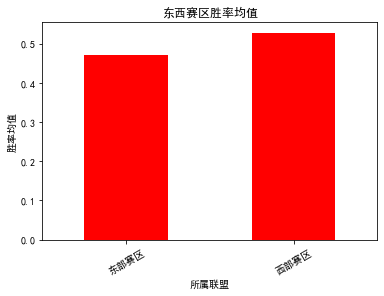

In [52]:
# 柱状图显示东西赛区的胜率均值，要求如下：
# 1. 柱状图颜色为“红色”，x 轴文字旋转30度
# 2. 分别使用 Pandas 和 Matplotlib 进行作图
df.groupby('所属联盟')['胜率'].mean().plot(kind='bar',color='red')
plt.title('东西赛区胜率均值')
plt.xlabel('所属联盟')
plt.ylabel('胜率均值')
plt.xticks(rotation=30)
plt.show()

# 2. 爬取以下网址的历年中国人口数据进行并进行分析

url = 'https://population.gotohui.com/'

In [4]:
# 爬取数据并存放到df，并将df保存为population.csv
data=pd.read_html("https://population.gotohui.com/",header=0)
df=data[0]
df.to_csv('population.csv',index=False)

In [5]:
# 统计df表格中的空值
df.isnull().sum()

时间             0
人口(万人)         0
出生率(‰)         0
增长率(‰)         0
老年(%)         39
儿童(%)         39
男性(%)         12
女性(%)         12
全国出生人口(万人)    48
全国死亡人口(万人)    48
dtype: int64

In [12]:
# 将空值的列'老年(%)'、'儿童(%)'中数据用前值替换；'男性(%)'、'女性(%)'用均值替换
df['老年(%)'].fillna(method='ffill',inplace=True)
df['儿童(%)'].fillna(method='ffill',inplace=True)
df['男性(%)'].fillna(df['男性(%)'].mean(),inplace=True)
df['女性(%)'].fillna(df['女性(%)'].mean(),inplace=True)
df

,时间,人口(万人),出生率(‰),增长率(‰),老年(%),儿童(%),男性(%),女性(%),全国出生人口(万人),全国死亡人口(万人)
0,2023,140967.0,6.39,-1.48,15.4,16.36,51.10000,48.90000,902.0,1110.0
1,2022,141175.0,5.22,0.33,14.9,16.90,51.15000,48.85000,956.0,1041.0
2,2021,141260.0,7.52,0.34,14.2,17.47,51.20000,48.80000,1062.0,1014.0
3,2020,141178.0,8.52,1.45,13.5,17.95,51.24000,48.76000,1200.0,997.6
4,2019,140005.0,10.41,3.32,12.6,16.78,51.09000,48.91000,1465.0,998.0
...,...,...,...,...,...,...,...,...,...,...
70,1953,58796.0,37.00,23.00,4.9,33.60,51.41254,48.58746,NaN,NaN
71,1952,57482.0,37.00,20.00,4.9,33.60,51.90000,48.10000,NaN,NaN
72,1951,56300.0,37.80,20.00,4.9,33.60,51.92000,48.08000,NaN,NaN
73,1950,55196.0,37.00,19.00,4.9,33.60,51.94000,48.06000,NaN,NaN


In [22]:
# 将除了 时间(年) 列外所有的列的数据改成保留小数点后2位小数
# 提示：采用lambda函数和applymap函数
df.iloc[:,1:]=df.iloc[:,1:].applymap(lambda x:round(x,2))
df

,时间,人口(万人),出生率(‰),增长率(‰),老年(%),儿童(%),男性(%),女性(%),全国出生人口(万人),全国死亡人口(万人)
0,2023,140967.0,6.39,-1.48,15.4,16.36,51.10,48.90,902.0,1110.0
1,2022,141175.0,5.22,0.33,14.9,16.90,51.15,48.85,956.0,1041.0
2,2021,141260.0,7.52,0.34,14.2,17.47,51.20,48.80,1062.0,1014.0
3,2020,141178.0,8.52,1.45,13.5,17.95,51.24,48.76,1200.0,997.6
4,2019,140005.0,10.41,3.32,12.6,16.78,51.09,48.91,1465.0,998.0
...,...,...,...,...,...,...,...,...,...,...
70,1953,58796.0,37.00,23.00,4.9,33.60,51.41,48.59,NaN,NaN
71,1952,57482.0,37.00,20.00,4.9,33.60,51.90,48.10,NaN,NaN
72,1951,56300.0,37.80,20.00,4.9,33.60,51.92,48.08,NaN,NaN
73,1950,55196.0,37.00,19.00,4.9,33.60,51.94,48.06,NaN,NaN


Text(0, 0.5, '‰')

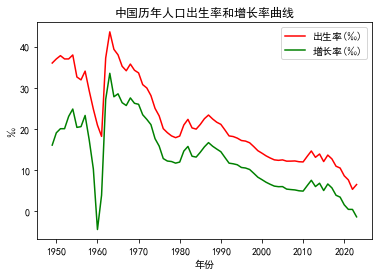

In [37]:
# 在同一张表上绘制历年人口出生率和增长率曲线，要求如下：
# 1. 使用 Matplotlib
# 2. 图标题为“中国历年人口出生率和增长率曲线”，x 轴标题是“年份”，y 轴标题是“‰”
# 3. 出生率曲线为“红色实线”，增长率为“绿色虚线”
# 4. 需要有图例（legend）
# df[['出生率(‰)','增长率(‰)']].plot(kind='line',color=['red','green'],legend=True)
plt.plot(df['时间'], df['出生率(‰)'], color='red', label='出生率(‰)')
plt.plot(df['时间'], df['增长率(‰)'], color='green', label='增长率(‰)')
plt.legend()
plt.title('中国历年人口出生率和增长率曲线')
plt.xlabel('年份')
plt.ylabel('‰')

Text(0, 0.5, '百分比差值')

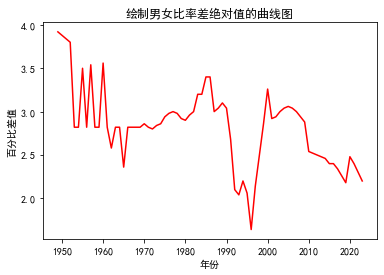

In [40]:
# 绘制男女比率差绝对值的曲线图
plt.plot(df['时间'],(df['男性(%)']-df['女性(%)']).abs(),color='red')
plt.title('绘制男女比率差绝对值的曲线图')
plt.xlabel('年份')
plt.ylabel('百分比差值')

Text(0, 0.5, '‰')

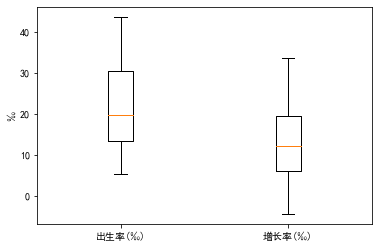

In [48]:
# 在同一幅图上画出'出生率(‰)', '增长率(‰)'箱线图。
plt.boxplot([df['出生率(‰)'], df['增长率(‰)']], labels=['出生率(‰)', '增长率(‰)'])
plt.ylabel('‰')

[1963]


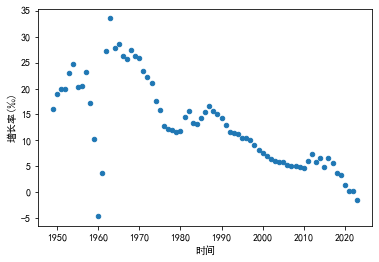

In [119]:
# 绘制 年份 和 增长率(‰) 的散点图，寻找 ‘增长率(‰)’ 异常值的年份，即寻找增长率背离正常变化范围的年份。
df.plot(kind='scatter',x='时间',y='增长率(‰)')
difference=df[df['增长率(‰)'] > df['增长率(‰)'].mean() + 2 * df['增长率(‰)'].std()]
print(difference['时间'].values)

([<matplotlib.patches.Wedge at 0x237cb480400>,
 [Text(0.9816712330362057, 0.49630795906289443, '老年'),
  Text(0.11383571598819324, 1.094093885260975, '儿童'),
  Text(-0.5952334965127244, -0.9250389638438138, '其它')],
 [Text(0.5354570362015667, 0.2707134322161242, '14.90%'),
  Text(0.06209220872083267, 0.5967784828696227, '16.90%'),
  Text(-0.3246728162796678, -0.5045667075511712, '68.20%')])

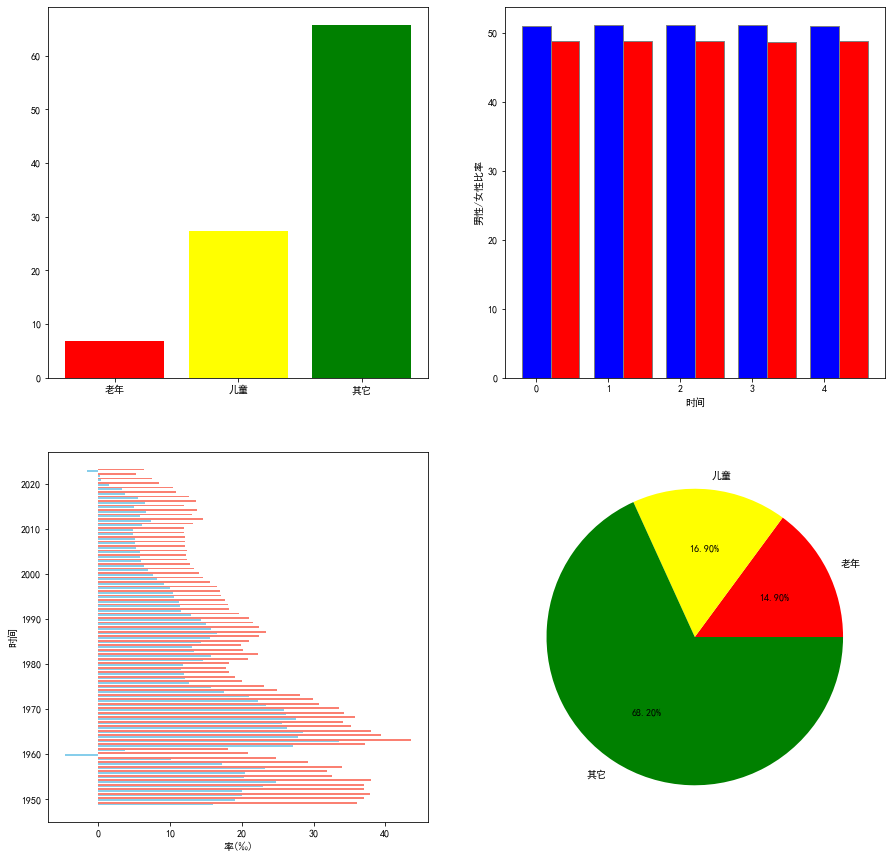

In [131]:
# 在一个画布的四个子画布上(两行两列)分别画出：
# 1、近十年老人、儿童、其它（100减去老人、儿童占比）人群比率均值的柱状比较图
# 2、近五年男性、女性比率的柱状比较图
# 3、近十年人口增增长率和出生率的水平柱状图
# 4、2022年老人、儿童、其它的饼图

# 建议使用创建 fig, ax 对象的方式
# fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
ax1.bar(['老年', '儿童', '其它'],[df['老年(%)'].mean(),df['儿童(%)'].mean(),(100-df['老年(%)']-df['儿童(%)']).mean()],color=['red','yellow','green'])

barWidth = 0.4
r1 = range(len(df[:5]))
r2 = [x + barWidth for x in r1]
ax2.bar(r1, df[:5]['男性(%)'], color='b', width=barWidth, edgecolor='grey', label='男性(%)')
ax2.bar(r2, df[:5]['女性(%)'], color='r', width=barWidth, edgecolor='grey', label='女性(%)')
ax2.set_xlabel('时间')
ax2.set_ylabel('男性/女性比率')

ax3.barh(df['时间'] - barWidth/2, df['增长率(‰)'], height=barWidth, label='增长率(‰)', color='skyblue')
ax3.barh(df['时间'] + barWidth/2, df['出生率(‰)'], height=barWidth, label='出生率(‰)', color='salmon')
ax3.set_xlabel('率(‰)')
ax3.set_ylabel('时间')

sizes = [
    df[df['时间']==2022]['老年(%)'].values[0],
    df[df['时间']==2022]['儿童(%)'].values[0],
    (100 - df[df['时间']==2022]['老年(%)'].values[0] - df[df['时间']==2022]['儿童(%)'].values[0])
]
ax4.pie(sizes, labels=['老年', '儿童', '其它'], autopct='%1.2f%%', colors=['red', 'yellow', 'green'])

# 3. 获取大学排名数据并进行分析

- 获取数据地址：http://www.jdxzz.com/paiming/2022/0830/9651208.html
- 数据爬取后，存在“主榜”和“副榜”，只保留主榜数据

>提示：
```
data = pd.read_html(url, header=0) #header=0 去掉第一行列索引
df = pd.DataFrame(data[0]) # 只获取主榜表格数据
```

In [2]:
# 获取“主榜”数据并放入df
data = pd.read_html('http://www.jdxzz.com/paiming/2022/0830/9651208.html',header=0,encoding = 'gb2312')
df = pd.DataFrame(data[0])
df

D:\anacon\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


,全国排名,学校名称,总分,星级排名,办学层次
0,1,北京大学,100.00,8★,世界一流大学
1,2,清华大学,99.84,8★,世界一流大学
2,3,上海交通大学,80.25,8★,世界一流大学
3,4,浙江大学,80.21,8★,世界一流大学
4,5,武汉大学,77.59,8★,世界一流大学
...,...,...,...,...,...
523,524,嘉兴南湖学院,60.00,1★,区域知名大学
524,524,赣东学院,60.00,1★,区域知名大学
525,524,湖州学院,60.00,1★,区域知名大学
526,524,山西工学院,60.00,1★,区域知名大学


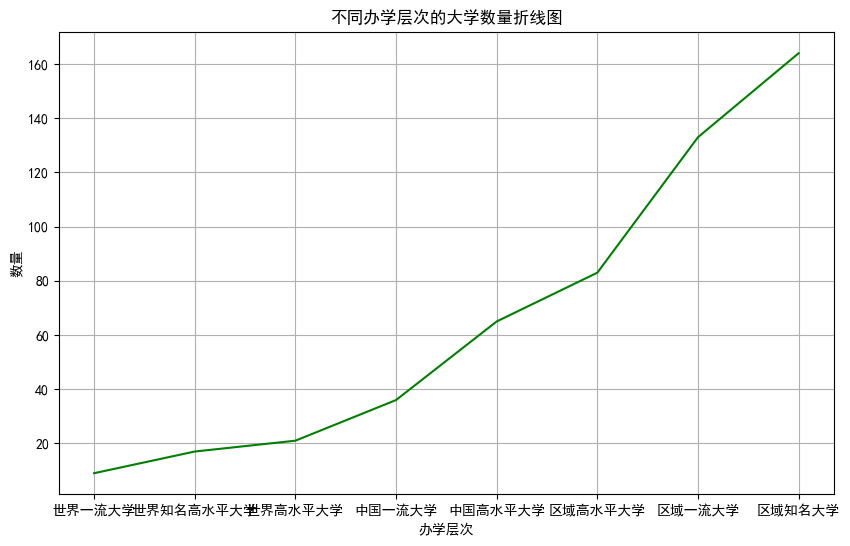

In [3]:
# 不同 办学层次 的大学数量？
# 画出不同 办学层次 的大学数量的水平柱状图，按升序画，柱状图颜色为绿色
df_group = df.groupby(by='办学层次')["办学层次"].count().reset_index(name='数量')
df_group = df_group.sort_values(by='数量',ascending=True).reset_index(drop=True)
df_group
                     
plt.figure(figsize=(10, 6)) 
plt.plot(df_group['办学层次'], df_group['数量'],color='green') 

plt.title('不同办学层次的大学数量折线图')  
plt.xlabel('办学层次')  
plt.ylabel('数量')  
  
plt.grid(True)  
plt.show()

In [4]:
# 显示只包含 财经大学、财经学院 的子表，并按全国排名排列，形成子表 df_
df_gdufe = df.query('学校名称.str.contains("财经")', engine='python').reset_index(drop=True)
df_gdufe

,全国排名,学校名称,总分,星级排名,办学层次
0,46,中南财经政法大学,63.64,6★,世界高水平大学
1,59,上海财经大学,63.15,6★,世界高水平大学
2,62,西南财经大学,63.10,5★,中国一流大学
3,92,东北财经大学,62.08,5★,中国一流大学
4,96,中央财经大学,62.01,5★,中国一流大学
5,101,江西财经大学,61.78,5★,中国一流大学
6,128,山东财经大学,61.18,4★,中国高水平大学
7,149,山西财经大学,61.03,4★,中国高水平大学
8,155,天津财经大学,61.00,4★,中国高水平大学
9,194,浙江财经大学,60.73,4★,中国高水平大学


In [5]:
# 计算财经类大学（df_）不同 办学层次 大学的 总分均值、排名均值，四舍五入取一位小数
df_grouped = df.groupby(by='办学层次').agg({'总分':'mean','全国排名':'mean'}).round(1)
df_grouped.columns = ["总分均值","排名均值"]
df_grouped

,总分均值,排名均值
办学层次,,
世界一流大学,82.6,5.0
世界知名高水平大学,71.3,18.2
世界高水平大学,64.5,45.9
中国一流大学,62.9,65.4
中国高水平大学,61.6,116.0
区域一流大学,60.7,218.8
区域知名大学,60.1,437.0
区域高水平大学,60.3,318.9


# 4. 获取sina股票数据并进行分析

- 获取数据地址：http://vip.stock.finance.sina.com.cn/q/go.php/vComStockHold/kind/jjzc/index.phtml?p=
- 数据分6页，p=1代表第1页

>提示

```
df = pd.DataFrame()
for i in range(6):    
    url = 'http://vip.stock.finance.sina.com.cn/q/go.php/vComStockHold/kind/jjzc/index.phtml?p={page}'.format(page=i+1)
    df = pd.concat([df, pd.read_html(url)[0]]) # 按行连接
    print("第{page}页爬取成功！".format(page=i+1))
```

In [140]:
# 爬取6页表格数据并合并数据到df，再保存到sina.csv文件
df = pd.DataFrame()
for i in range(6):    
    url = 'http://vip.stock.finance.sina.com.cn/q/go.php/vComStockHold/kind/jjzc/index.phtml?p={page}'.format(page=i+1)
    df = pd.concat([df, pd.read_html(url)[0]]) # 按行连接
    print("第{page}页爬取成功！".format(page=i+1))
df.to_csv('sina.csv',index=False)

第1页爬取成功！
第2页爬取成功！
第3页爬取成功！
第4页爬取成功！
第5页爬取成功！
第6页爬取成功！


In [192]:
# 从sina.csv中读取到df，并随机显示10行数据
df=pd.read_csv('sina.csv')
df.sample(10)

,代码,简称,截至日期,家数,本期持股数(万股),持股占已流通A股比例(%),同上期增减(万股),持股比例(%),上期家数,明细
69,600195,中牧股份,2024-03-31,3,3202.4532,3.14,-2595.3637,5.68,6,+展开明细
26,600085,同仁堂,2024-03-31,6,7882.6804,5.75,831.2944,5.14,3,+展开明细
98,600276,恒瑞医药,2024-03-31,3,22214.7407,3.48,6775.6341,2.42,2,+展开明细
201,600642,申能股份,2024-03-31,2,5148.4512,1.05,2359.2883,0.57,1,+展开明细
189,600606,绿地控股,2024-03-31,3,15588.1486,1.11,4513.9296,0.79,2,+展开明细
45,600132,重庆啤酒,2024-03-31,3,681.4865,1.41,217.9350,0.96,2,+展开明细
158,600528,中铁工业,2024-03-31,2,2799.5688,1.26,1182.5688,0.73,1,+展开明细
116,600328,中盐化工,2024-03-31,1,381.7310,0.26,381.7310,0.00,0,+展开明细
215,600674,川投能源,2024-03-31,1,2571.5096,0.53,-1827.2899,0.96,2,+展开明细
80,600212,绿能慧充,2024-03-31,4,1852.5625,2.66,611.3525,1.78,2,+展开明细


In [193]:
# 按照持股 家数 分组 计算 持股占已流通A股比例(%) 的平均数 降序
df.groupby(['本期持股数(万股)','家数'])['持股占已流通A股比例(%)'].mean().sort_values(ascending=False)

本期持股数(万股)  家数
7967.5117  4     8.71
3414.9200  3     7.62
3453.8148  5     7.32
4507.7054  5     6.85
5171.7579  4     6.83
                 ... 
582.2365   1     0.20
1175.4690  1     0.15
896.2975   1     0.14
870.0200   1     0.13
387.0800   1     0.09
Name: 持股占已流通A股比例(%), Length: 240, dtype: float64

In [194]:
# 统计家数增加最多的10个股票，按 家数变化 和 持股占已流通A股比例(%) 降序排序
df['家数变化'] = df['家数'] - df['上期家数']
df.sort_values(by=['家数变化', '持股占已流通A股比例(%)'], ascending=[False, False])[:10]

,代码,简称,截至日期,家数,本期持股数(万股),持股占已流通A股比例(%),同上期增减(万股),持股比例(%),上期家数,明细,家数变化
73,600199,金种子酒,2024-03-31,5,4507.7054,6.85,568.4278,5.99,2,+展开明细,3
26,600085,同仁堂,2024-03-31,6,7882.6804,5.75,831.2944,5.14,3,+展开明细,3
124,600362,江西铜业,2024-03-31,4,3085.9180,0.89,2310.9451,0.22,1,+展开明细,3
159,600529,山东药玻,2024-03-31,4,4177.5835,6.30,1315.2659,4.31,2,+展开明细,2
37,600111,北方稀土,2024-03-31,6,12627.0763,3.49,6080.9148,1.81,4,+展开明细,2
129,600373,中文传媒,2024-03-31,3,3887.4611,2.87,1489.6077,1.77,1,+展开明细,2
80,600212,绿能慧充,2024-03-31,4,1852.5625,2.66,611.3525,1.78,2,+展开明细,2
192,600621,华鑫股份,2024-03-31,4,2584.7016,2.44,769.7690,1.71,2,+展开明细,2
53,600157,永泰能源,2024-03-31,2,41671.5691,1.88,41671.5691,0.00,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.60,1609.4406,0.00,0,+展开明细,2


In [195]:
# 将 持股占已流通A股比例(%)>8 同时 持股比例(%)>5 的股票挑选出来
df.loc[(df['持股占已流通A股比例(%)']>8)%(df['持股比例(%)']>5)]

,代码,简称,截至日期,家数,本期持股数(万股),持股占已流通A股比例(%),同上期增减(万股),持股比例(%),上期家数,明细,家数变化
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
...,...,...,...,...,...,...,...,...,...,...,...
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2
0,600007,中国国贸,2024-03-31,2,1609.4406,1.6,1609.4406,0.0,0,+展开明细,2


In [196]:
# 将%号加到 持股占已流通A股比例(%) 和 持股比例(%) 两列， 元素值改为字符串
# 如 10.93 改为 10.93% 的字符串
df[['持股占已流通A股比例(%)','持股比例(%)']]=df[['持股占已流通A股比例(%)','持股比例(%)']].applymap(lambda x: '{:.2f}%'.format(x))
df

,代码,简称,截至日期,家数,本期持股数(万股),持股占已流通A股比例(%),同上期增减(万股),持股比例(%),上期家数,明细,家数变化
0,600007,中国国贸,2024-03-31,2,1609.4406,1.60%,1609.4406,0.00%,0,+展开明细,2
1,600008,首创环保,2024-03-31,3,8949.5863,1.22%,3239.0700,0.78%,3,+展开明细,0
2,600009,上海机场,2024-03-31,4,4416.1922,1.77%,1553.5940,1.15%,3,+展开明细,1
3,600010,包钢股份,2024-03-31,2,41558.0448,0.92%,41558.0448,0.00%,0,+展开明细,2
4,600012,皖通高速,2024-03-31,3,1685.3807,1.02%,943.8807,0.45%,2,+展开明细,1
...,...,...,...,...,...,...,...,...,...,...,...
235,600726,华电能源,2024-03-31,2,2138.4400,0.27%,-10.4811,0.27%,2,+展开明细,0
236,600727,鲁北化工,2024-03-31,1,442.4020,0.84%,-355.6853,1.51%,4,+展开明细,-3
237,600729,重庆百货,2024-03-31,3,3414.9200,7.62%,-378.7875,9.33%,3,+展开明细,0
238,600731,湖南海利,2024-03-31,1,550.2402,0.98%,0.0000,0.98%,1,+展开明细,0
